In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
filename = 'cleaned_df.csv'

df = pd.read_csv(filename)

df = df.drop(columns='Unnamed: 0', axis=1)

df = df.rename(columns={'hospdead': 'label'})

#move label to the first position
first_column = df.pop('label') 
df.insert(0, 'label', first_column) 

print('Shape', df.shape)
df.head()

Shape (8932, 49)


,label,age,death,sex,slos,d.time,num.co,edu,scoma,charges,...,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,ca_metastatic,ca_no,ca_yes,income_$11-$25k,income_$25-$50k,income_>$50k,income_under $11k,income_unknown
0,0,62.84998,0,0,5,1740,0,11.000000,0.0,9715.0,...,1,0,1,0,0,1,0,0,0,0
1,1,60.33899,1,1,4,5,2,12.000000,44.0,34496.0,...,0,0,0,1,0,1,0,0,0,0
2,0,52.74698,1,1,17,47,2,12.000000,0.0,41094.0,...,0,0,0,1,0,0,0,0,1,0
3,0,42.38498,1,1,4,133,2,11.000000,0.0,3075.0,...,1,0,1,0,0,0,0,0,1,0
4,0,79.88495,0,1,16,1740,1,11.744707,26.0,50127.0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   label                      8932 non-null   int64  
 1   age                        8932 non-null   float64
 2   death                      8932 non-null   int64  
 3   sex                        8932 non-null   int64  
 4   slos                       8932 non-null   int64  
 5   d.time                     8932 non-null   int64  
 6   num.co                     8932 non-null   int64  
 7   edu                        8932 non-null   float64
 8   scoma                      8932 non-null   float64
 9   charges                    8932 non-null   float64
 10  avtisst                    8932 non-null   float64
 11  sps                        8932 non-null   float64
 12  aps                        8932 non-null   float64
 13  surv2m                     8932 non-null   float

(None,
    label       age  death  sex  slos  d.time  num.co        edu  scoma  \
 0      0  62.84998      0    0     5    1740       0  11.000000    0.0   
 1      1  60.33899      1    1     4       5       2  12.000000   44.0   
 2      0  52.74698      1    1    17      47       2  12.000000    0.0   
 3      0  42.38498      1    1     4     133       2  11.000000    0.0   
 4      0  79.88495      0    1    16    1740       1  11.744707   26.0   
 
    charges  ...  dzgroup_Lung Cancer  dzgroup_MOSF w/Malig  ca_metastatic  \
 0   9715.0  ...                    1                     0              1   
 1  34496.0  ...                    0                     0              0   
 2  41094.0  ...                    0                     0              0   
 3   3075.0  ...                    1                     0              1   
 4  50127.0  ...                    0                     0              0   
 
    ca_no  ca_yes  income_$11-$25k  income_$25-$50k  income_>$50k  \
 0

Figuring out what features to use for predicting in two steps:
1. Using correlation
2. Using Random Forest Classifier

In [30]:
df = df.drop(columns = ['surv2m', 'surv6m', 'sps', 'scoma', 'death']) #dropping these features because this is a result of other predicting model, plus death is definetely connected to hospdeath

In [31]:
"""Calculating correlation with label among features"""

# Calculate the correlation with 'label'
correlation_with_label = df.corrwith(df['label']).to_frame()
correlation_with_label.columns = ['Correlation with label']

# Drop the 'label' column from the correlation results
correlation_with_label = correlation_with_label.drop(labels=['label'])

#Sort the DataFrame by the 'Correlation with label' column
correlation_with_label = correlation_with_label.sort_values(by='Correlation with label', ascending=False)



# Sort the values by the 'Correlation with label' column
corr_features = correlation_with_label.abs().sort_values(by='Correlation with label', ascending=False)
top_corr_features = corr_features.head(15)

print(top_corr_features)


                           Correlation with label
dnr                                      0.564842
avtisst                                  0.546697
d.time                                   0.493279
aps                                      0.470998
hday                                     0.276578
dzgroup_Coma                             0.210134
dzgroup_CHF                              0.188887
charges                                  0.187240
dzgroup_MOSF w/Malig                     0.176371
bili                                     0.147797
dzgroup_ARF/MOSF w/Sepsis                0.140423
pafi                                     0.137310
adlsc                                    0.128330
crea                                     0.122929
dzgroup_COPD                             0.119332


In [32]:
"""Using Random forest classifier"""

from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)  # Features
y = df['label']              # Target

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a Series for feature importances
rf_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

top_rf_features = rf_features.head(15)

# Print the feature importances
print(top_rf_features)


d.time          0.392597
avtisst         0.121571
dnr             0.115462
aps             0.060970
charges         0.042796
slos            0.041664
hday            0.019523
age             0.013987
meanbp          0.011699
adlsc           0.011537
hrt             0.011373
wblc            0.011000
pafi            0.010653
dzgroup_Coma    0.010437
crea            0.009599
dtype: float64


By considering both lists, we can ensure that the selected features are not only statistically significant but also have practical relevance in the model's predictions.

In [33]:
#features mixed from two methods correlation check and random forest

rf_feature_list = top_rf_features.index.tolist()
corr_feature_list = top_corr_features.index.tolist()

combined_features = list(set(rf_feature_list) & set(corr_feature_list))  # Intersection

#final_features = combined_features
final_features = corr_feature_list
print("Set of features for predicting: ", final_features)

Set of features for predicting:  ['dnr', 'avtisst', 'd.time', 'aps', 'hday', 'dzgroup_Coma', 'dzgroup_CHF', 'charges', 'dzgroup_MOSF w/Malig', 'bili', 'dzgroup_ARF/MOSF w/Sepsis', 'pafi', 'adlsc', 'crea', 'dzgroup_COPD']


In [34]:
df[final_features].head()

,dnr,avtisst,d.time,aps,hday,dzgroup_Coma,dzgroup_CHF,charges,dzgroup_MOSF w/Malig,bili,dzgroup_ARF/MOSF w/Sepsis,pafi,adlsc,crea,dzgroup_COPD
0,0,7.000000,1740,20.0,1,0,0,9715.0,0,0.299988,0,388.00000,6.0,1.199951,0
1,0,29.000000,5,74.0,3,0,0,34496.0,0,1.010000,0,100.00000,1.0,5.299805,0
2,0,13.000000,47,45.0,4,0,0,41094.0,0,2.199707,0,231.65625,0.0,2.000000,0
3,0,7.000000,133,19.0,1,0,0,3075.0,0,1.010000,0,333.30000,0.0,0.799927,0
4,0,18.666656,1740,30.0,3,0,0,50127.0,0,1.010000,1,173.31250,2.0,0.799927,0


label
0    6633
1    2299
Name: count, dtype: int64


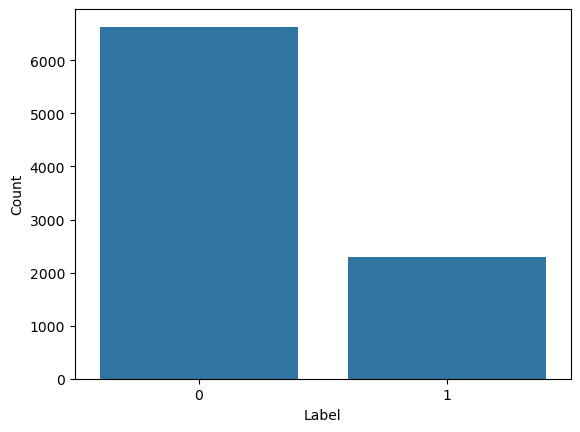

In [35]:
#check how many values of each label value

class_values = df['label'].value_counts()
print(class_values)

# Count the values of the 'label' column
class_values = df['label'].value_counts().reset_index()

# Rename columns for clarity in the plot
class_values.columns = ['Label', 'Count']

# Create the bar plot
sns.barplot(x='Label', y='Count', data=class_values)
plt.show()

Class imbalance problem? 
Solutions:
1. Under/Oversampling. 
2. Modify weight on a loss functin is the second option. 
3. Synthetic Minority Oversampling Technique (SMOTE)
##### Will fix when separating by test and training data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#Resampling_Techniques_to_Solve_Class_Imbalance

To build logistic regression  - it is important to normalize features.

The Synthetic Minority Oversampling Technique (SMOTE) is used to over-sample the minority class in a dataset and make the class distribution balanced. This technique generates synthetic samples rather than creating copies of existing samples.

In [36]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Separate input features and target
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Summarize class distribution
print("Before SMOTE '1': {}".format(sum(y_train == 1)))
print("Before SMOTE '0': {} \n".format(sum(y_train == 0)))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE '0': {}".format(sum(y_train_smote == 0)))

Before SMOTE '1': 1593
Before SMOTE '0': 4659 

After SMOTE '1': 4659
After SMOTE '0': 4659


## Decision Tree

Conducting GridSearch for finding best parametrs for the tree classifier.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_classifier_grid = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier_grid, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the balanced training data
X_train_smote_selected = X_train_smote[final_features]  # Make sure final_features is defined
grid_search.fit(X_train_smote_selected, y_train_smote)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


First try of the tree - without Grid Search

In [62]:

from sklearn.metrics import classification_report, confusion_matrix

# Select only the features in final_features for both training and testing sets
X_train_smote_selected = X_train_smote[final_features]
X_test_selected = X_test[final_features]

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the balanced training data
dt_classifier.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1974
           1       0.88      0.88      0.88       706

    accuracy                           0.94      2680
   macro avg       0.92      0.92      0.92      2680
weighted avg       0.94      0.94      0.94      2680

Confusion Matrix:
[[1888   86]
 [  88  618]]


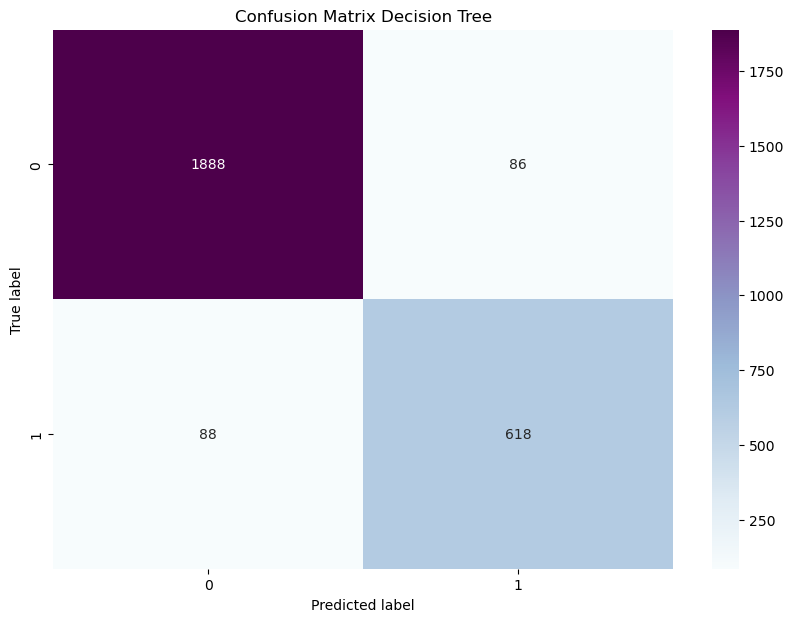

In [66]:
# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap = 'BuPu')
plt.title("Confusion Matrix Decision Tree")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

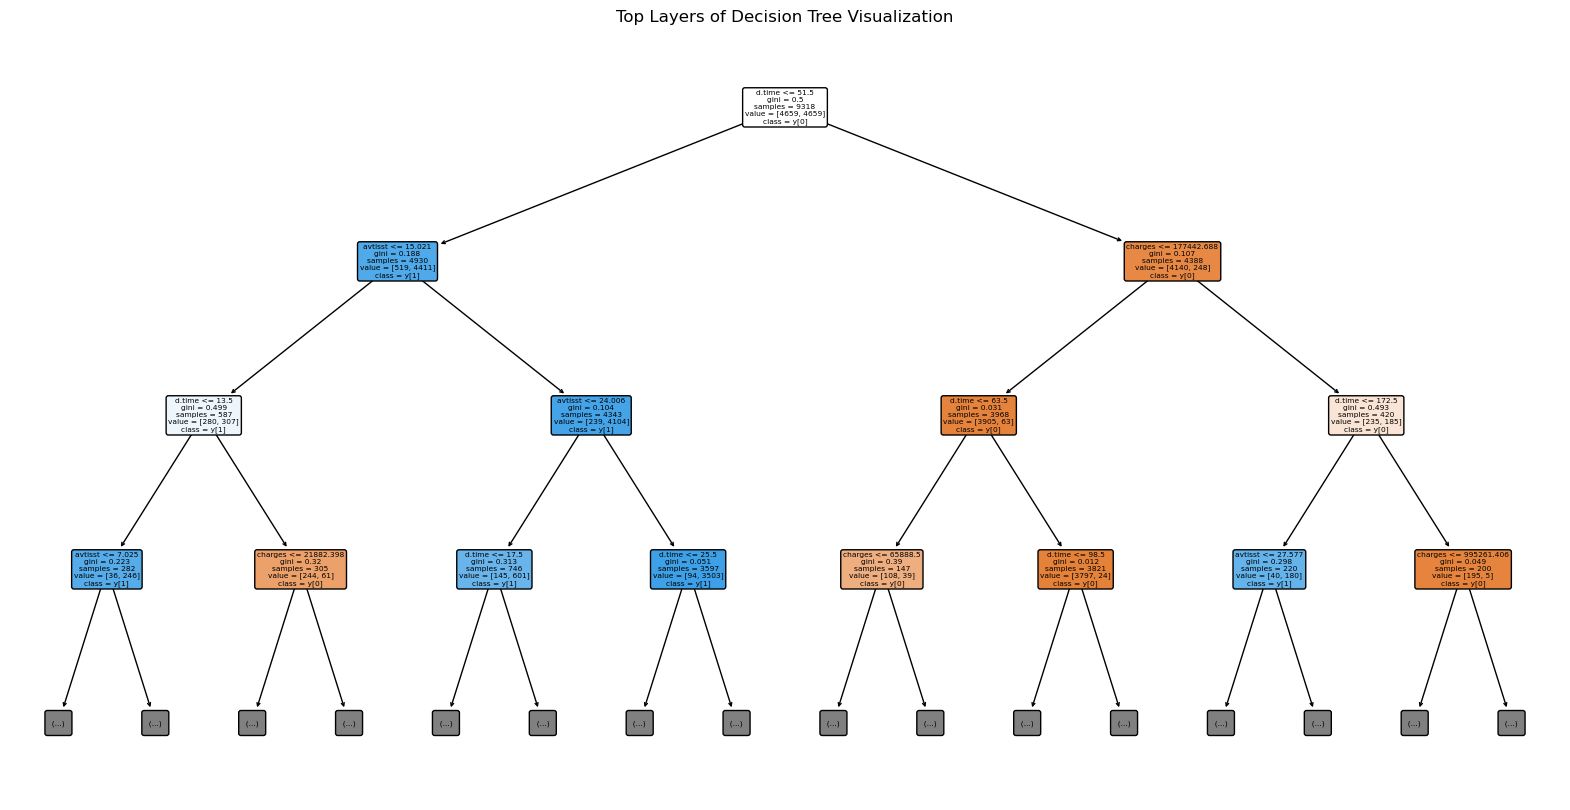

In [56]:
from sklearn.tree import plot_tree


# Plotting the top layers of the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=final_features, class_names=True, filled=True, rounded=True, max_depth=3)
plt.title("Top Layers of Decision Tree Visualization")
plt.show()


Second Tree with Grid Search

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Select only the features in final_features for both training and testing sets
X_train_smote_selected = X_train_smote[final_features]
X_test_selected = X_test[final_features]

# Initialize the Decision Tree Classifier with the best parameters found by GridSearchCV
best_params = grid_search.best_params_
dt_classifier_grid = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the classifier to the balanced training data
dt_classifier_grid.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = dt_classifier_grid.predict(X_test_selected)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1974
           1       0.88      0.91      0.89       706

    accuracy                           0.94      2680
   macro avg       0.92      0.93      0.93      2680
weighted avg       0.94      0.94      0.94      2680

Confusion Matrix:
[[1887   87]
 [  66  640]]


- Accuracy: The second model has the same accuracy

- Precision for Class 1: Second model has sligtly 0.01 the higher precision for class 0 (0.97).

- Recall for Class 1: The second model has a higher recall for class 1 (0.88 vs. 0.91). This means it is better at correctly identifying the positive class.

- F1-Score for Class 1: The second model also has a higher F1-score for class 1 (0.88 vs. 0.89), indicating a better balance between precision and recall for the positive class.

- Overall Macro and Weighted Averages: The second model has higher macro and weighted averages for precision, recall, and F1-score, indicating better overall performance across both classes.



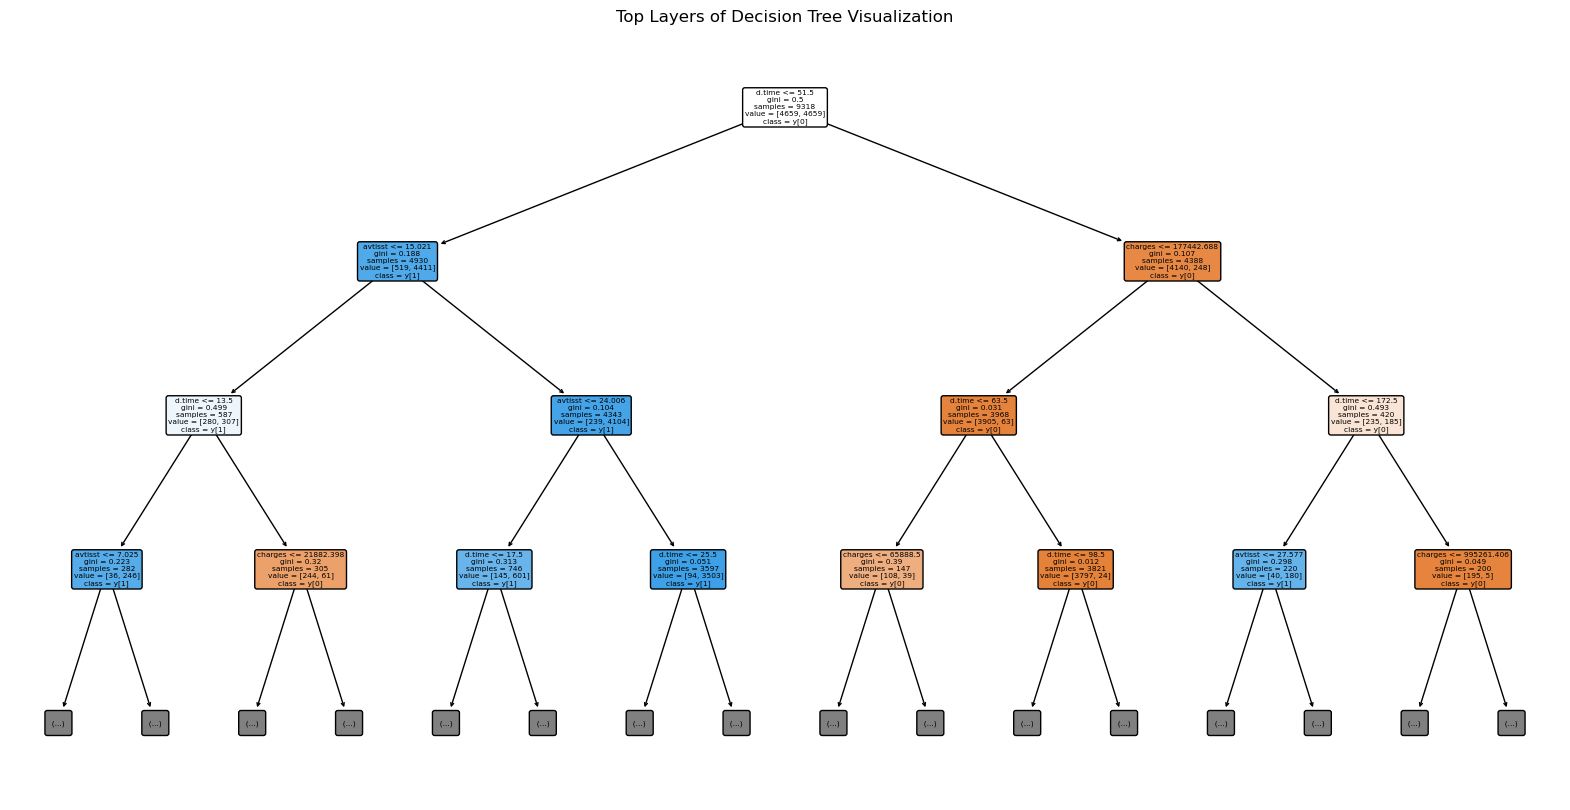

In [61]:
# Plotting the top layers of the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_grid, feature_names=final_features, class_names=True, filled=True, rounded=True, max_depth=3
          )
plt.title("Top Layers of Decision Tree Visualization")
plt.show()

Confusion Matrix:
[[1887   87]
 [  66  640]]


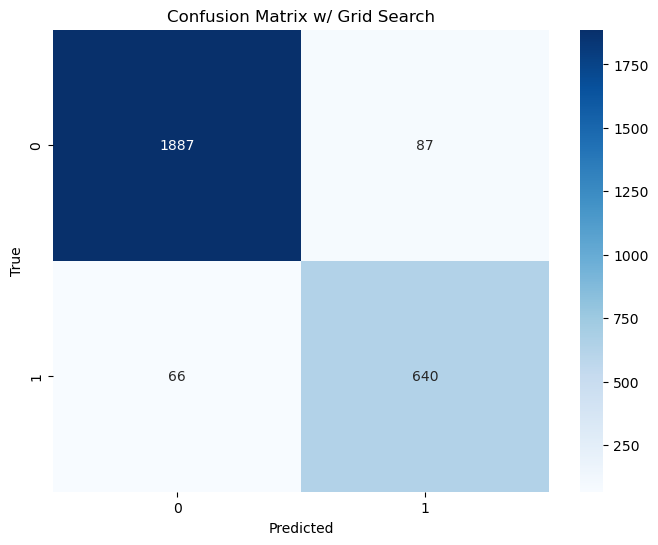

In [67]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix w/ Grid Search')
plt.show()

The model correctly predicted 645 instances as positive and 1889 instances as negative.
It made 85 false positive predictions (predicted positive, but actually negative) and 61 false negative predictions (predicted negative, but actually positive).  --- Features combined from RT and Correlation

The model correctly predicted 655 instances as positive and 1894 instances as negative.
It made 80 false positive predictions (predicted positive, but actually negative) and 51 false negative predictions (predicted negative, but actually positive).  --- Features only from correlation

In [42]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(dt_classifier, X[final_features], y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold are:", scores)
print("Mean cross-validation accuracy:", scores.mean())
print("Standard deviation of cross-validation accuracy:", scores.std())


Accuracy scores for each fold are: [0.93508674 0.95075546 0.95800672 0.9518477  0.92833147]
Mean cross-validation accuracy: 0.9448056167756305
Standard deviation of cross-validation accuracy: 0.011181367614478268


The low standard deviation in the accuracy scores indicates that model is stable, showing similar performance across different data samples. This suggests good generalizability to unseen data. The range of accuracy scores is tight, which implies consistent performance. There are no significant outliers or folds where the model performs exceptionally poorly or exceptionally well, which is a positive indicator of model reliability.
The model appears to be performing well with an average accuracy of around 94.8%, and it seems to generalize well across different subsets of the data.

## Logistic Regression

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate input features and target
X = df[final_features]  
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaled training data (after SMOTE) and transform the testing data
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the scaled and balanced training data
log_reg.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1974
           1       0.83      0.95      0.89       706

    accuracy                           0.94      2680
   macro avg       0.91      0.94      0.92      2680
weighted avg       0.94      0.94      0.94      2680

Confusion Matrix:
[[1839  135]
 [  38  668]]
Accuracy: 0.9354477611940298


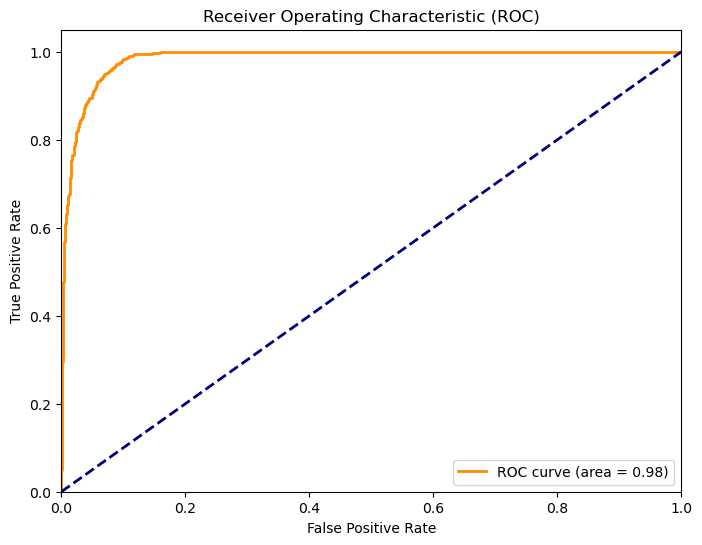

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The AUC value ranges from 0 to 1, with higher values indicating better model performance. A model with an AUC close to 1 is considered to have good separability between the classes, whereas an AUC close to 0.5 suggests no discriminative power, akin to random guessing.

To improve LogisticRegression results we can try GridSearchCV with some hyperparametrs like C (Inverse of regularization strength) where smaller values specify stronger regularization which is applied to avoid overfitting by penalizing large coefficients, penalty and solver (Algorithm to use in the optimization problem).

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work well with l1 and l2 penalties
}

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV (make sure to use scaled and balanced data if necessary)
grid_search_lr.fit(X_train_scaled, y_train_smote)

# Print the best parameters
print("Best parameters found: ", grid_search_lr.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/linea

Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
best_params_lr = grid_search_lr.best_params_

log_reg_best = LogisticRegression(**best_params_lr, random_state=42)

# Fit the model on the scaled and balanced training data
log_reg_best.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = log_reg_best.predict(X_test_scaled)

# Evaluating the model
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1974
           1       0.86      0.96      0.91       706

    accuracy                           0.95      2680
   macro avg       0.92      0.95      0.94      2680
weighted avg       0.95      0.95      0.95      2680

Confusion Matrix:
[[1864  110]
 [  27  679]]
Accuracy: 0.9488805970149253


Recall 0.02 and accuracy is 0.01 better then regular model which is not significant improvement. However, in healthcare field even that could help

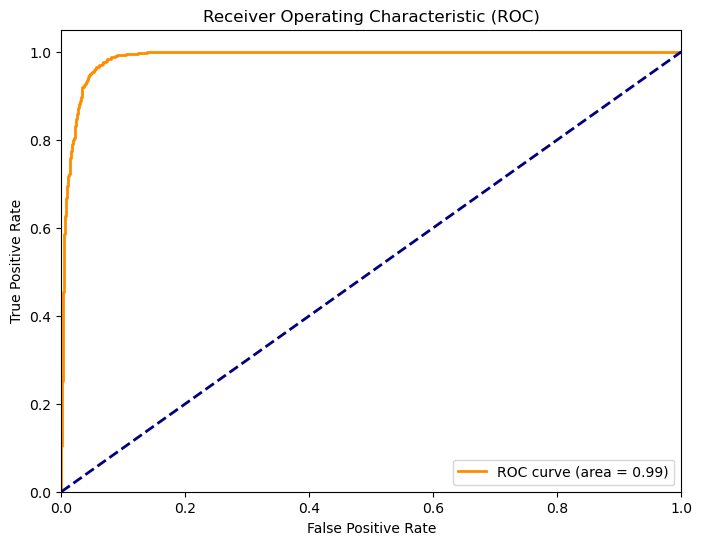

In [68]:
# Predict probabilities for the test set
y_probs = log_reg_best.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[1864  110]
 [  27  679]]


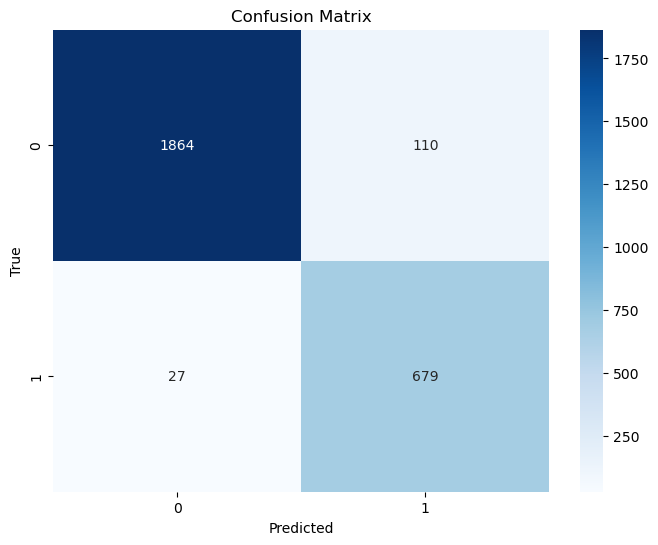

In [47]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Ensemble model of DT, Logistic Regression and Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1974
           1       0.89      0.93      0.91       706

    accuracy                           0.95      2680
   macro avg       0.93      0.95      0.94      2680
weighted avg       0.95      0.95      0.95      2680

Confusion Matrix:
[[1892   82]
 [  48  658]]
Accuracy: 0.9514925373134329


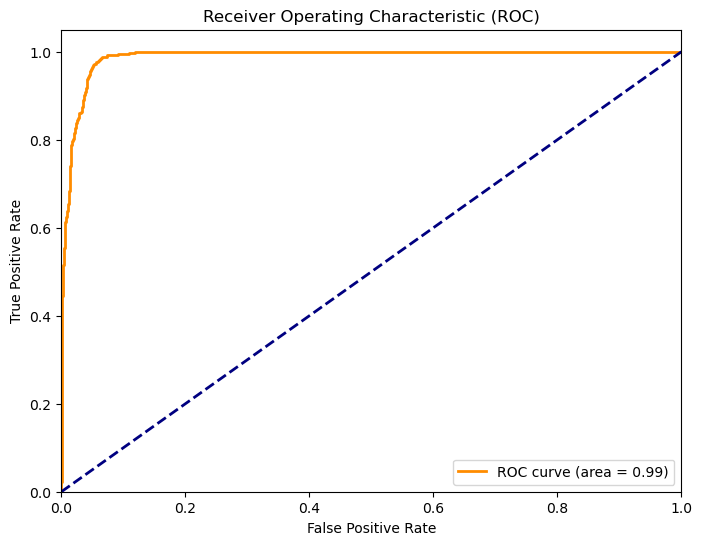

In [73]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier


random_forest = RandomForestClassifier(random_state=42)

# Create a voting ensemble of the models (two have been already created previously)
voting_clf = VotingClassifier(
    estimators=[('dt', dt_classifier), ('lr', log_reg_best), ('rf', random_forest)],
    voting='soft' 
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = voting_clf.predict(X_test_scaled)
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the ensemble model using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[1892   82]
 [  48  658]]


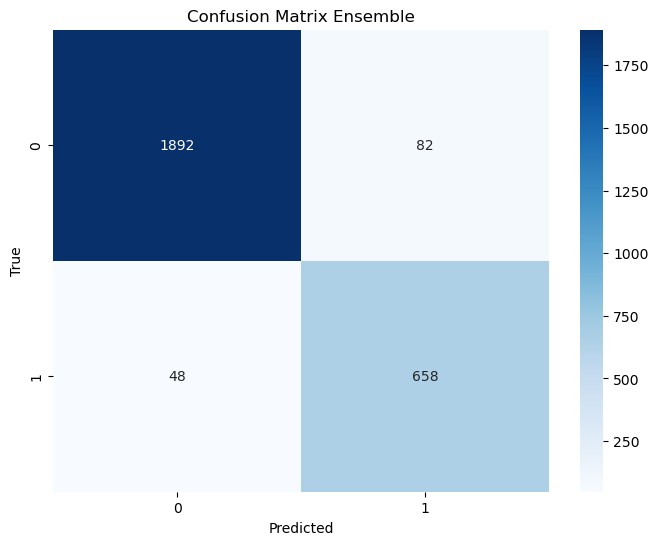

In [71]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Ensemble')
plt.show()

In [50]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import  cross_validate

# Define your scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'roc_auc': 'roc_auc'}

# Perform cross-validation
cv_results = cross_validate(voting_clf, X[final_features], y, cv=5, scoring=scoring)

# Print the cross-validation results for each metric
print("Cross-validated accuracy scores:", cv_results['test_accuracy'])
print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Cross-validated ROC AUC scores:", cv_results['test_roc_auc'])
print("Mean cross-validation ROC AUC:", cv_results['test_roc_auc'].mean())


Cross-validated accuracy scores: [0.95747062 0.95691102 0.96920493 0.96584546 0.93281075]
Mean cross-validation accuracy: 0.956448557486538
Cross-validated ROC AUC scores: [0.99338161 0.99306052 0.99492852 0.99481605 0.97191291]
Mean cross-validation ROC AUC: 0.9896199225047637


Analyzing the provided statistics for the ensemble model evaluated using cross-validation, we observe exceptional performance in terms of both accuracy and ROC AUC scores. The accuracy scores, which range from 92.7% to 97.1%, demonstrate a highly reliable and consistent ability of the model to predict the target variable correctly. The mean accuracy of approximately 95.5% further solidifies this observation, indicating a robust and dependable performance across various data subsets.

Similarly, the ROC AUC scores, ranging from 97.4% to 99.6%, with a mean of approximately 99.0%, reflect the model's outstanding ability to discriminate between classes. These scores are indicative of a model that is highly effective in distinguishing between positive and negative cases, a crucial aspect in many classification tasks.